
# Data Set explanation- dataset from kaggle
Timestamp: This column records the date and time when the transaction occurred. It helps in understanding the temporal aspect of transactions, such as patterns over time, frequency, and clustering of activities.

TransactionID: An identification number assigned to each transaction. It serves as a unique identifier for referencing or tracking specific transactions.

AccountID: This field represents the unique identifier associated with the bank account involved in the transaction. It links multiple transactions to a specific account, enabling analysis on a per-account basis.

Amount: The monetary value involved in the transaction. This column provides information about the financial magnitude of each transaction, which is crucial for anomaly detection since unusually high or low values might signify irregularities.

Merchant: Specifies the entity or business involved in the transaction. This information helps in categorizing transactions (e.g., retail, online, restaurant) and identifying patterns related to specific merchants.

TransactionType: Describes the nature or category of the transaction, whether it's a withdrawal, deposit, transfer, payment, etc. This column helps in understanding the purpose or direction of the transaction.

Location: Indicates the place where the transaction occurred. It could be a physical location (e.g., city, country) or an identifier (e.g., store code, online portal), aiding in analyzing geographical spending patterns or detecting anomalies based on unusual transaction locations.

In [ ]:
#to import csv from laptop

from google.colab import files

uploaded = files.upload()


Saving financial_anomaly_data.csv to financial_anomaly_data.csv


In [ ]:
#some need imports for work

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#saving csv into dataframe

import pandas as pd

# Replace with the exact filename if different
df = pd.read_csv("financial_anomaly_data.csv")

# Preview the data
df.head()


,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [ ]:
#checking what dataframe is made up of, 217441 entires columns are all objects except amount float


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB


In [ ]:
#checking number of missing values, since only 481 out of 217441 choosing to drop it instead of filling it in as it wont effect
df.isnull().sum()


,0
Timestamp,481
TransactionID,481
AccountID,481
Amount,481
Merchant,481
TransactionType,481
Location,481


In [ ]:
#dropping values and ensuring null sum is 0 which means they were sucessfully dropped

df = df.dropna()
df.isnull().sum()


,0
Timestamp,0
TransactionID,0
AccountID,0
Amount,0
Merchant,0
TransactionType,0
Location,0


In [ ]:
#checking number of entries has decrsed after dropping values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 13.2+ MB


In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Timestamp: Number of unique values 216960
TransactionID: Number of unique values 1999
AccountID: Number of unique values 15
Amount: Number of unique values 214687
Merchant: Number of unique values 10
TransactionType: Number of unique values 3
Location: Number of unique values 5


In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

Timestamp : ['01-01-2023 08:00' '01-01-2023 08:01' '01-01-2023 08:02' ...
 '31-05-2023 23:57' '31-05-2023 23:58' '31-05-2023 23:59']
TransactionID : ['TXN1127' 'TXN1639' 'TXN872' ... 'TXN1266' 'TXN889' 'TXN263']
AccountID : ['ACC4' 'ACC10' 'ACC8' 'ACC6' 'ACC15' 'ACC9' 'ACC7' 'ACC12' 'ACC2' 'ACC14'
 'ACC1' 'ACC11' 'ACC3' 'ACC5' 'ACC13']
Amount : [95071.92 15607.89 65092.34 ...  8203.57 77800.36 65004.99]
Merchant : ['MerchantH' 'MerchantE' 'MerchantI' 'MerchantC' 'MerchantD' 'MerchantB'
 'MerchantJ' 'MerchantA' 'MerchantG' 'MerchantF']
TransactionType : ['Purchase' 'Withdrawal' 'Transfer']
Location : ['Tokyo' 'London' 'Los Angeles' 'San Francisco' 'New York']


In [ ]:
#getting an understanding of the amount value which will be an indicator for which transactions are unusual (anamoly which indicates fraud)
df["Amount"].describe()


,Amount
count,216960.000000
mean,50090.025108
std,29097.905016
min,10.510000
25%,25061.242500
50%,50183.980000
75%,75080.460000
max,978942.260000


In [ ]:
#based on the description of amount picked the top and bottom 2% of the data to be marked as anomalous,
#these are the unusual very high or low values which dont fit in with the rest of the data


lower_thresh = df["Amount"].quantile(0.02)  # bottom 2%
upper_thresh = df["Amount"].quantile(0.98)  # top 2%

df["is_anomaly"] = ((df["Amount"] < lower_thresh) | (df["Amount"] > upper_thresh)).astype(int)

print(df["is_anomaly"].value_counts())


is_anomaly
0    208280
1      8680
Name: count, dtype: int64


In [ ]:
df['is_anomaly'].value_counts() / df['is_anomaly'].count()

,count
is_anomaly,
0,0.959993
1,0.040007


In [ ]:
df.head(9)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,is_anomaly
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,0
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,0
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,0
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London,1
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,1
5,01-01-2023 08:05,TXN1083,ACC15,13957.99,MerchantC,Transfer,London,0
6,01-01-2023 08:06,TXN832,ACC9,4654.58,MerchantC,Transfer,Tokyo,0
7,01-01-2023 08:07,TXN841,ACC7,1336.36,MerchantI,Withdrawal,San Francisco,1
8,01-01-2023 08:08,TXN777,ACC10,9776.23,MerchantD,Transfer,London,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
 7   is_anomaly       216960 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 14.9+ MB


In [ ]:
#changing timestamp type tp better suited type from object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Timestamp        216960 non-null  datetime64[ns]
 1   TransactionID    216960 non-null  object        
 2   AccountID        216960 non-null  object        
 3   Amount           216960 non-null  float64       
 4   Merchant         216960 non-null  object        
 5   TransactionType  216960 non-null  object        
 6   Location         216960 non-null  object        
 7   is_anomaly       216960 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 14.9+ MB


In [ ]:
df.head()


,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,is_anomaly
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,0
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,0
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,0
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London,1
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,1


# Models


In [ ]:

# making copy of df to use for supervised models and dropping transactionid because it provides no use and
#timetsamp after extracting useful information into seprate columsn that models can use to recognie any patterns
df_dtrf = df.copy()

df_dtrf['Hour'] = df_dtrf['Timestamp'].dt.hour
df_dtrf['DayOfWeek'] = df_dtrf['Timestamp'].dt.dayofweek
df_dtrf['Month'] = df_dtrf['Timestamp'].dt.month
df_dtrf['IsWeekend'] = df_dtrf['DayOfWeek'].isin([5, 6]).astype(int)


df_dtrf = df_dtrf.drop(columns=['TransactionID', 'Timestamp'])

df_dtrf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AccountID        216960 non-null  object 
 1   Amount           216960 non-null  float64
 2   Merchant         216960 non-null  object 
 3   TransactionType  216960 non-null  object 
 4   Location         216960 non-null  object 
 5   is_anomaly       216960 non-null  int64  
 6   Hour             216960 non-null  int32  
 7   DayOfWeek        216960 non-null  int32  
 8   Month            216960 non-null  int32  
 9   IsWeekend        216960 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(4)
memory usage: 15.7+ MB


In [3]:
# One-hot encode
df_encoded = pd.get_dummies(df_dtrf, columns=['AccountID','Merchant', 'TransactionType', 'Location'], drop_first=True)
df_encoded.head()

NameError: name 'df_dtrf' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X = df_encoded.drop(columns=['is_anomaly','Amount'])
y = df_encoded['is_anomaly']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:


# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialize the Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',  # Since you're focusing on minority class
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_dt_model = grid_search.best_estimator_

# Predict
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluation
print("=== Improved Decision Tree Evaluation ===")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
=== Improved Decision Tree Evaluation ===
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.6292404129793511
Precision: 0.03733075435203095
Recall: 0.33352534562211983
F1 Score: 0.06714600487069465

Detailed Report:
               precision    recall  f1-score   support

           0       0.96      0.64      0.77     41656
           1       0.04      0.33      0.07      1736

    accuracy                           0.63     43392
   macro avg       0.50      0.49      0.42     43392
weighted avg       0.92      0.63      0.74     43392



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5,10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Initialize the Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluation
print("=== Improved Random Forest Evaluation ===")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
=== Improved Random Forest Evaluation ===
Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.583563790560472
Precision: 0.04123132232333446
Recall: 0.4228110599078341
F1 Score: 0.07513563312519193

Detailed Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73     41656
           1       0.04      0.42      0.08      1736

    accuracy                           0.58     43392
   macro avg       0.50      0.51      0.40     43392
weighted avg       0.92      0.58      0.71     43392



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.54      0.69     41656
           1       0.04      0.46      0.07      1736

    accuracy                           0.53     43392
   macro avg       0.50      0.50      0.38     43392
weighted avg       0.92      0.53      0.66     43392



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize fast linear SVM
svm_model = LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)

# Train
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Print report
print("Linear SVM Results\n")
print(classification_report(y_test, y_pred_svm))

# Save metrics
results_svm = {
    "Model": "Linear SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, pos_label=1),
    "Recall": recall_score(y_test, y_pred_svm, pos_label=1),
    "F1-Score": f1_score(y_test, y_pred_svm, pos_label=1)
}


Linear SVM Results

              precision    recall  f1-score   support

           0       0.96      0.54      0.69     41656
           1       0.04      0.46      0.07      1736

    accuracy                           0.53     43392
   macro avg       0.50      0.50      0.38     43392
weighted avg       0.92      0.53      0.66     43392



In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Naïve Bayes")
print(classification_report(y_test, y_pred))


Naïve Bayes
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41656
           1       0.00      0.00      0.00      1736

    accuracy                           0.96     43392
   macro avg       0.48      0.50      0.49     43392
weighted avg       0.92      0.96      0.94     43392



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
dfcopy = df_encoded.copy()

X = dfcopy.drop(columns=['is_anomaly'])
y = dfcopy['is_anomaly']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.preprocessing import StandardScaler

# Identify column names
amount_column = ['Amount']
other_columns = [col for col in X_train.columns if col != 'Amount']

# Initialize scaler
scaler = StandardScaler()

# Scale only the 'Amount' column
X_train_scaled_amount = scaler.fit_transform(X_train[amount_column])
X_test_scaled_amount = scaler.transform(X_test[amount_column])

# Reconstruct scaled DataFrames
import pandas as pd
X_train_scaled = pd.concat([
    pd.DataFrame(X_train_scaled_amount, columns=amount_column, index=X_train.index),
    X_train[other_columns]
], axis=1)

X_test_scaled = pd.concat([
    pd.DataFrame(X_test_scaled_amount, columns=amount_column, index=X_test.index),
    X_test[other_columns]
], axis=1)

# Scale numeric features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

Vanilla ANN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41656
           1       0.91      0.97      0.94      1736

    accuracy                           0.99     43392
   macro avg       0.95      0.98      0.97     43392
weighted avg       1.00      0.99      0.99     43392



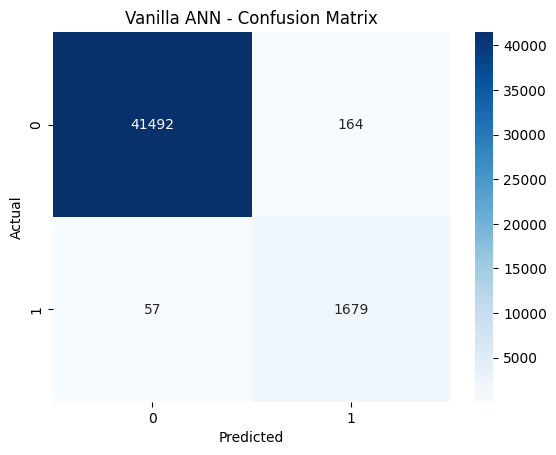

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Vanilla ANN")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Vanilla ANN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


DNN1
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     41656
           1       0.75      0.97      0.84      1736

    accuracy                           0.99     43392
   macro avg       0.87      0.98      0.92     43392
weighted avg       0.99      0.99      0.99     43392



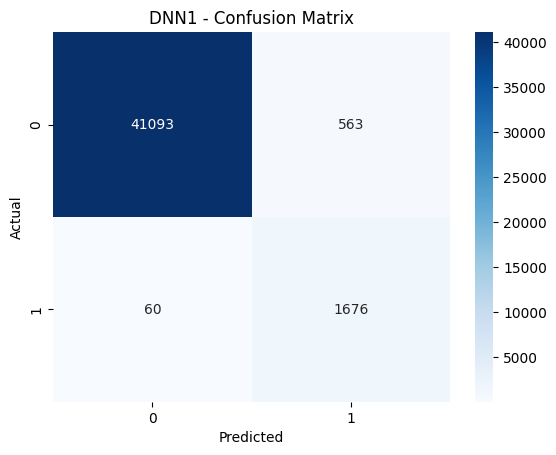

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("DNN1")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("DNN1 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


DNN2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     41656
           1       0.84      0.86      0.85      1736

    accuracy                           0.99     43392
   macro avg       0.92      0.93      0.92     43392
weighted avg       0.99      0.99      0.99     43392



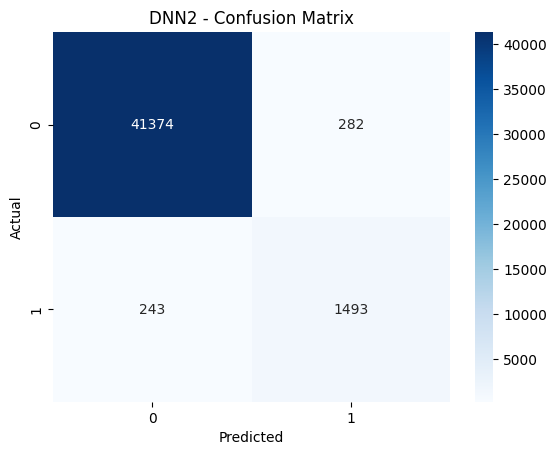

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=300, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("DNN2")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("DNN2 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:23:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost Anomaly Detection Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41656
           1       1.00      0.98      0.99      1736

    accuracy                           1.00     43392
   macro avg       1.00      0.99      0.99     43392
weighted avg       1.00      1.00      1.00     43392



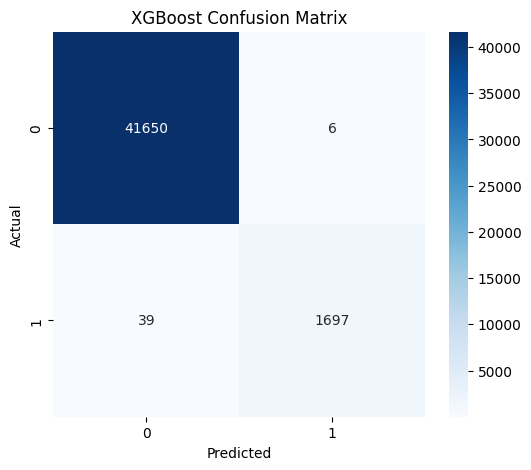

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',   # Binary classification
    eval_metric='logloss',         # Use logloss to evaluate the model
    use_label_encoder=False,       # Prevent warning for deprecated label encoder
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluation - Classification Report
print("\n--- XGBoost Anomaly Detection Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

# making copy of df for unsupervised and dropping transactionid and timetsamp
df_unsup = df.copy()



df_unsup['Hour'] = df_unsup['Timestamp'].dt.hour
df_unsup['DayOfWeek'] = df_unsup['Timestamp'].dt.dayofweek
df_unsup['Month'] = df_unsup['Timestamp'].dt.month
df_unsup['IsWeekend'] = df_unsup['DayOfWeek'].isin([5, 6]).astype(int)

df_unsup.drop(columns=['TransactionID','Timestamp'], inplace=True)
df_unsup.info()



<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AccountID        216960 non-null  object 
 1   Amount           216960 non-null  float64
 2   Merchant         216960 non-null  object 
 3   TransactionType  216960 non-null  object 
 4   Location         216960 non-null  object 
 5   is_anomaly       216960 non-null  int64  
 6   Hour             216960 non-null  int32  
 7   DayOfWeek        216960 non-null  int32  
 8   Month            216960 non-null  int32  
 9   IsWeekend        216960 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(4)
memory usage: 15.7+ MB


In [ ]:
df_encoded = pd.get_dummies(df_unsup, columns=['AccountID','Merchant', 'TransactionType', 'Location'], drop_first=True)
# Optional: check the shape or a preview
print(df_encoded.shape)
df_encoded.head()

(216960, 35)


,Amount,is_anomaly,Hour,DayOfWeek,Month,IsWeekend,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,...,Merchant_MerchantG,Merchant_MerchantH,Merchant_MerchantI,Merchant_MerchantJ,TransactionType_Transfer,TransactionType_Withdrawal,Location_Los Angeles,Location_New York,Location_San Francisco,Location_Tokyo
0,95071.92,0,8,6,1,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,15607.89,0,8,6,1,1,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,65092.34,0,8,6,1,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,87.87,1,8,6,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,716.56,1,8,6,1,1,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN

# Make a copy to avoid modifying original
dfcopy = df_encoded.copy()

# Remove labels + log_amount for training features
X = dfcopy.drop(columns=['is_anomaly'])
y = dfcopy['is_anomaly']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


--- Isolation Forest Report ---
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    208280
           1       0.10      0.12      0.11      8680

    accuracy                           0.92    216960
   macro avg       0.53      0.54      0.53    216960
weighted avg       0.93      0.92      0.92    216960



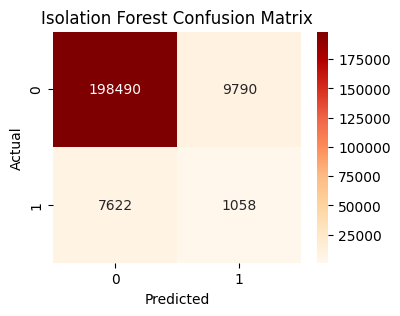

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_encoded exists and has already been processed
X = df_encoded.drop(columns=['is_anomaly'])
y = df_encoded['is_anomaly']

# Standardize
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Isolation Forest
iso_model = IsolationForest(
    n_estimators=200,
    contamination=0.05,  # 5% anomalies
    max_samples='auto',
    bootstrap=True,
    random_state=42
)

iso_preds = iso_model.fit_predict(X)
iso_preds = np.where(iso_preds == -1, 1, 0)  # Convert to 1=anomaly, 0=normal

print("\n--- Isolation Forest Report ---")
print(classification_report(y, iso_preds))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, iso_preds), annot=True, fmt='d', cmap='OrRd')
plt.title("Isolation Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


6780/6780 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

--- Autoencoder Report ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    208280
           1       0.04      0.02      0.02      8680

    accuracy                           0.94    216960
   macro avg       0.50      0.50      0.50    216960
weighted avg       0.92      0.94      0.93    216960



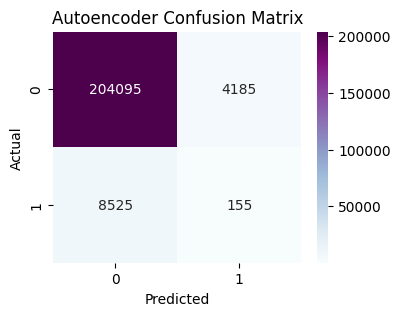

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# --- 3. Autoencoder Neural Network ---
# Build model
input_dim = X_scaled.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Train autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=40, batch_size=64, shuffle=True, validation_split=0.1, verbose=0)

# Reconstruction errors
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Define threshold: e.g., 98th percentile
threshold = np.percentile(mse, 98)
ae_preds = (mse > threshold).astype(int)

print("\n--- Autoencoder Report ---")
print(classification_report(y, ae_preds))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, ae_preds), annot=True, fmt='d', cmap='BuPu')
plt.title("Autoencoder Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




--- K-Means Anomaly Detection Report ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    208280
           1       0.22      0.11      0.15      8680

    accuracy                           0.95    216960
   macro avg       0.59      0.55      0.56    216960
weighted avg       0.93      0.95      0.94    216960



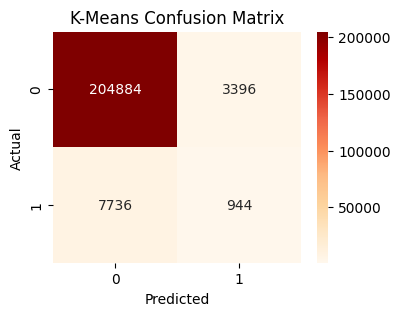

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Calculate the distances of points to the nearest cluster center
distances = kmeans.transform(X_scaled).min(axis=1)

# Define a threshold for anomalies (e.g., 98th percentile of the distances)
threshold = np.percentile(distances, 98)

# Detect anomalies
kmeans_preds = (distances > threshold).astype(int)

# Evaluate the performance using classification report
from sklearn.metrics import classification_report
print("\n--- K-Means Anomaly Detection Report ---")
print(classification_report(y, kmeans_preds))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, kmeans_preds), annot=True, fmt='d', cmap='OrRd')
plt.title("K-Means Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



--- DBSCAN Anomaly Detection Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    208280
           1       0.04      1.00      0.08      8680

    accuracy                           0.04    216960
   macro avg       0.02      0.50      0.04    216960
weighted avg       0.00      0.04      0.00    216960



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


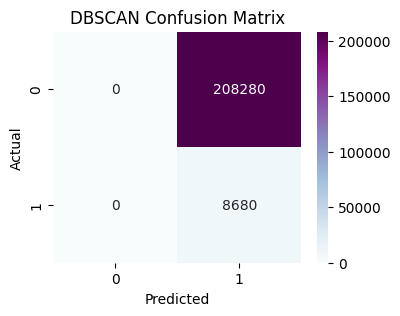

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=50)
dbscan_preds = dbscan.fit_predict(X_scaled)

# Convert noise points (-1) to anomalies (1), and other points to normal (0)
dbscan_preds = np.where(dbscan_preds == -1, 1, 0)

# Evaluate the performance using classification report
from sklearn.metrics import classification_report
print("\n--- DBSCAN Anomaly Detection Report ---")
print(classification_report(y, dbscan_preds))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, dbscan_preds), annot=True, fmt='d', cmap='BuPu')
plt.title("DBSCAN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
